In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
myData = pd.read_csv('./data/mycar.csv')

In [57]:
myData

,Speed,Stopping_dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16
5,9,10
6,10,18
7,10,26
8,10,34
9,11,17


In [32]:
X = myData.iloc[:,:-1].values
Y = myData.iloc[:,1].values

In [44]:
X = pd.DataFrame(myData.Speed)
Y = pd.DataFrame(myData.Stopping_dist)

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.3)

In [35]:
from sklearn.linear_model import LinearRegression
myModel = LinearRegression() #Обозначаем, что наша модель - линейная регрессия
myModel.fit(X_train,y_train); #обучаем модель на обучающих данных

In [23]:
y_pred = myModel.predict(X_test)
pd.Series(y_pred)

0     75.644279
1     52.308458
2     40.640547
3     21.194030
4     60.087065
5     32.861940
6     40.640547
7      9.526119
8     32.861940
9     71.754975
10    60.087065
11    56.197761
12    52.308458
13    28.972637
14    25.083333
dtype: float64

In [24]:
mean_absolute_error(y_test,y_pred)

13.261857379767823

In [50]:
import sklearn.datasets
import sklearn.metrics
import matplotlib.pyplot as plt

In [29]:
X, y = sklearn.datasets.load_diabetes(return_X_y=True)

X_train, X_test, y_train, y_test = \
    sklearn.model_selection.train_test_split(X, y, random_state=1)

In [27]:
import autosklearn.classification
import autosklearn.regression

In [25]:
automl = autosklearn.classification.AutoSklearnClassifier(
    include = {
        'classifier': ["random_forest"],
        'feature_preprocessor': ["no_preprocessing"]
    },
    exclude=None
)

In [46]:
automl = autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task=120,
    per_run_time_limit=20,
    tmp_folder='/tmp/autosklearn_regression_example_tmp',
)
automl.fit(X_train, y_train, dataset_name='diabetes')

AutoSklearnRegressor(per_run_time_limit=20, time_left_for_this_task=120,
                     tmp_folder='/tmp/autosklearn_regression_example_tmp')

In [48]:
print(automl.leaderboard())
print(automl.show_models())

          rank  ensemble_weight                 type      cost  duration
model_id                                                                
56           1             0.66  k_nearest_neighbors  0.387456  0.469905
13           2             0.34           libsvm_svr  0.479173  0.448185
[(0.660000, SimpleRegressionPipeline({'data_preprocessor:__choice__': 'feature_type', 'feature_preprocessor:__choice__': 'polynomial', 'regressor:__choice__': 'k_nearest_neighbors', 'data_preprocessor:feature_type:categorical_transformer:categorical_encoding:__choice__': 'no_encoding', 'data_preprocessor:feature_type:categorical_transformer:category_coalescence:__choice__': 'minority_coalescer', 'data_preprocessor:feature_type:numerical_transformer:imputation:strategy': 'most_frequent', 'data_preprocessor:feature_type:numerical_transformer:rescaling:__choice__': 'robust_scaler', 'feature_preprocessor:polynomial:degree': 3, 'feature_preprocessor:polynomial:include_bias': 'True', 'feature_preprocessor

In [49]:
train_predictions = automl.predict(X_train)
print("Train R2 score:", sklearn.metrics.r2_score(y_train, train_predictions))
test_predictions = automl.predict(X_test)
print("Test R2 score:", sklearn.metrics.r2_score(y_test, test_predictions))

Train R2 score: 0.7570644737666662
Test R2 score: 0.42357271251668693


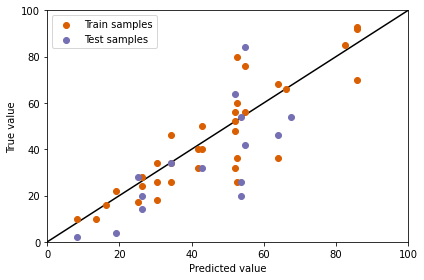

In [52]:
plt.scatter(train_predictions, y_train, label="Train samples", c='#d95f02')
plt.scatter(test_predictions, y_test, label="Test samples", c='#7570b3')
plt.xlabel("Predicted value")
plt.ylabel("True value")
plt.legend()
plt.plot([0, 100], [0, 100], c='k', zorder=0)
plt.xlim([0, 100])
plt.ylim([0, 100])
plt.tight_layout()
plt.show()

In [54]:
y_pred = automl.predict(X_test)

In [55]:
mean_absolute_error(y_test,y_pred)

13.40828579266866

In [56]:
y_pred

array([42.97976303, 54.7540493 , 53.75119209,  8.30000043, 53.75119209,
       18.95690441, 26.34833241, 63.88833427, 26.34833241, 54.7540493 ,
       53.75119209, 51.90261841, 25.13404751, 67.42547607, 34.16261768])

In [58]:
import autosklearn
print(autosklearn.__version__)

0.14.2


In [60]:
import sklearn
print(sklearn.__version__)

0.24.1
